# NLP Assignment - 1
# Harman Singh - 2019042
# Yash Bhargava - 2019289


In [386]:
#Importing essential libraries
import numpy as np
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import words
!pip install pyspellchecker
!pip install contractions
from spellchecker import SpellChecker
import contractions
from tqdm import tqdm
nltk.download("vader_lexicon")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [387]:
#Loading dataset

def load_dataset(path):
  '''Loads the dataset (in CSV format) from the path provided

  Parameters:
  ------------
  path: str
     OS path at which the file is located
    
  Returns
  ------------
  pandas.core.frame.DataFrame
     Pandas dataframe object consisting of the data

  '''

  df = pd.read_csv(path)
  return df

In [388]:
#Splitting dataset by class
def split_dataset(data, label_column):
  '''Splits the dataframe by label

  Parameters:
  ------------
  data: pandas.core.frame.DataFrame
    Dataset that is to be split by class labels

  label_column: str
    Name of the column containing labels
    
  Returns
  ------------
  dict
    Dictionary consisting of class labels as keys and corresponding dataset (pandas.core.frame.DataFrame) as values

  '''
  data_split = {}
  df_temp = data.groupby(label_column)
  for label, dataset in df_temp:
      data_split[label] = dataset
  return data_split

In [389]:
if __name__ == "__main__":
  df = load_dataset("/content/drive/MyDrive/Sem-7_NLP/A1_dataset.csv")

In [390]:
df.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...


In [391]:
split_df = split_dataset(df, 'LABEL')

In [392]:
class_0_text = list(split_df[0]['TEXT'])

In [393]:
class_0_labels = list(split_df[0]['LABEL'])

In [394]:
class_1_text = list(split_df[1]['TEXT'])

In [395]:
class_1_labels = list(split_df[1]['LABEL'])

# Q1 (A)


a)

In [408]:
def Q1a_helper(data):
  '''
  finds average number of sentences and tokens

  Parameters:
  ------------
  data: list
    Dataset that is to be analyzed

  Returns
  ------------
  None
  '''

  total_num_of_sentences = 0
  total_num_of_tokens = 0
  all_sentences=[]
  for tweet in data:
    tweet_sans_extra_whitespaces = re.sub(r'^\s*|\s*$', '', tweet)
    sentences_list = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', tweet_sans_extra_whitespaces)
    total_num_of_sentences += len(sentences_list)
    all_sentences.append(sentences_list)

    for sentence in sentences_list:
      tokens = re.findall(r'\w+|[^\w\s]+|[\'\w\-]+', sentence)
      total_num_of_tokens += len(tokens)
  
  print('Total number of sentences: ', total_num_of_sentences)
  print('Average number of sentences: ', total_num_of_sentences/len(data))
  print('Total number of tokens: ', total_num_of_tokens)
  print('Average number of tokens: ', total_num_of_tokens/len(data))
  return all_sentences

In [409]:
def Q1a():
  print('For class 0')
  Q1a_helper(class_0_text)
  print('--------')
  print('For class 1')
  Q1a_helper(class_1_text)
Q1a()

For class 0
Total number of sentences:  3395
Average number of sentences:  1.6975
Total number of tokens:  33919
Average number of tokens:  16.9595
--------
For class 1
Total number of sentences:  4037
Average number of sentences:  1.765194578049847
Total number of tokens:  38214
Average number of tokens:  16.70922606034106


b)

In [364]:
def find_n_words_vowels(data):
  '''Finds the words starting with vowels in the dataset

  Parameters:
  ------------
  data: list
    list of textual samples for which the number of words starting with vowels is to be calculated

  Returns
  ------------
  list, int
    list of lists consisting of the words starting with vowels, total number of words in the dataset starting with vowels

  '''
  words_vowels = []
  n_words_vowels = 0
  for text in data:
    result_list = re.findall(r'\b[aeiouAEIOU].*?\b', text)
    words_vowels.append(result_list)
    n_words_vowels+=len(result_list)
  return words_vowels, n_words_vowels


In [370]:
def find_n_words_consonants(data):
  '''Finds the words starting with consonants in the dataset

  Parameters:
  ------------
  data: list
    list of textual samples for which the number of words starting with consonants is to be calculated

  Returns
  ------------
  list, int
    list of lists consisting of the words starting with consonants, total number of words in the dataset starting with consonants

  '''
  words_consonants = []
  n_words_consonants = 0
  for text in data:
    result_list = re.findall(r'\b[b-df-hj-np-tv-zB-DF-HJ-NP-TV-Z].*?\b', text)
    words_consonants.append(result_list)
    n_words_consonants+=len(result_list)
  return words_consonants, n_words_consonants


In [371]:
#For label 0
words_vowels_0, n_words_vowels_0 = find_n_words_vowels(class_0_text)
print(f"The number of words starting with vowels for class {0} is: {n_words_vowels_0}")

The number of words starting with vowels for class 0 is: 6990


In [491]:
#For label 0
words_consonants_0, n_words_consonants_0 = find_n_words_consonants(class_0_text)
print(f"The number of words starting with consonants for class {0} is: {n_words_consonants_0}")

The number of words starting with consonants for class 0 is: 20925


In [492]:
#For label 1
words_vowels_1, n_words_vowels_1 = find_n_words_vowels(class_1_text)
print(f"The number of words starting with vowels for class {1} is: {n_words_vowels_1}")

The number of words starting with vowels for class 1 is: 7189


In [493]:
#For label 1
words_consonants_1, n_words_consonants_1 = find_n_words_consonants(class_1_text)
print(f"The number of words starting with consonants for class {1} is: {n_words_consonants_1}")

The number of words starting with consonants for class 1 is: 22782


c)

In [398]:
def myLowercaseFunction(matchObj):
  return chr( ord(matchObj.group(0)) + 32)

In [399]:
def lowercaseTextUsingRegex(data):
  lowercaseData = re.sub(r'[A-Z]', myLowercaseFunction, data)
  return lowercaseData

In [400]:
def Q1c_class_wise_analysis(data):
  tokens_before_lowercasing = []
  tokens_after_lowercasing = []

  for tweet in data:
    # analysis before lowercasing
    tweet_sans_extra_whitespaces = re.sub(r'^\s*|\s*$', '', tweet)
    sentences_list = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', tweet_sans_extra_whitespaces)
    for sentence in sentences_list:
      tokens = re.findall(r'\w+|[^\w\s]+|[\'\w\-]+', sentence)
      tokens_before_lowercasing += tokens
    
    # analysis after lowercasing
    new_tweet = lowercaseTextUsingRegex(tweet)
    new_tweet_sans_extra_whitespaces = re.sub(r'^\s*|\s*$', '', new_tweet)
    new_sentences_list = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', new_tweet_sans_extra_whitespaces)
    for new_sentence in new_sentences_list:
      new_tokens = re.findall(r'\w+|[^\w\s]+|[\'\w\-]+', new_sentence)
      tokens_after_lowercasing += new_tokens
  
  # difference
  print('Number of unique tokens before lowercasing: ', len(set(tokens_before_lowercasing)))
  print('Number of unique tokens after lowercasing: ', len(set(tokens_after_lowercasing)))

In [494]:
def Q1c():
  # Assumption: Tokens !!! and !! are treated as different tokens
  print('For class 0')
  Q1c_class_wise_analysis(class_0_text)
  print('--------')
  print('For class 1')
  Q1c_class_wise_analysis(class_1_text)
Q1c()

For class 0
Number of unique tokens before lowercasing:  6534
Number of unique tokens after lowercasing:  5737
--------
For class 1
Number of unique tokens before lowercasing:  8042
Number of unique tokens after lowercasing:  7009


d)

In [149]:
def find_usernames(data):
  '''Finds usernames in the dataset

  Parameters:
  ------------
  data: list
    list of textual samples for which the number of usernames is to be calculated

  Returns
  ------------
  list, int
    list of lists consisting of usernames, total number of usernames in the dataset

  '''
  words_usernames = []
  n_words_usernames = 0
  for text in data:
    result_list = re.findall(r'\B@\w+', text)
    words_usernames.append(result_list)
    n_words_usernames+=len(result_list)
  return words_usernames, n_words_usernames

In [495]:
#For label 0
usernames_0, n_usernames_0 = find_usernames(class_0_text)
print(f"The number of usernames for class {0} is: {n_usernames_0}")
print(f"The usernames are: {[username[0] for username in usernames_0 if username]}")

The number of usernames for class 0 is: 802
The usernames are: ['@sokendrakouture', '@flyingbolt', '@digitallearnin', '@Luke', '@buckhollywood', '@alix_says', '@mykiaisosm', '@Sally_That_Girl', '@marginatasnaily', '@NewerDeal', '@meggles89', '@ferrite', '@karon', '@IngaDurgin', '@OfficialAS', '@The_Gov', '@uyennguyen_', '@Peace_P', '@markvanbaale', '@Fashionsourcing', '@alexispratsides', '@johnny_trouble', '@omerrr', '@BabyBree96', '@David_Henrie', '@ChrisCavs', '@pinkkpaiige12', '@BrettKloesel', '@laurenbotzspons', '@tommcfly', '@RealKidPoker', '@rayamartin', '@Affan', '@chrisworthy', '@kevridesthecab', '@allergist', '@johnpapa', '@writeplayrepeat', '@crunchpow', '@HautePersian', '@MrBenRubery', '@pickassoreborn', '@stephenfry', '@musewire', '@rosaliiinda', '@courtney319', '@Mr_Marty', '@gavin8', '@DelbertShoopman', '@pirrofina', '@ShannynB', '@cultureshockmag', '@MatchesMalone', '@dianalogs', '@miiikeo', '@MaryLandrum', '@tonycarrera', '@jonasbrothers', '@shamara99', '@kikuuu', '@mcf

In [496]:
#For label 1
usernames_1, n_usernames_1 = find_usernames(class_1_text)
print(f"The number of usernames for class {1} is: {n_usernames_1}")
print(f"The usernames are: {[username[0] for username in usernames_1 if username]}")

The number of usernames for class 1 is: 1304
The usernames are: ['@awaisnaseer', '@Marama', '@gfalcone601', '@mrstessyman', '@GetMeVideo', '@tb78', '@RealDeal32', '@yoginifoodie', '@mileycyrus', '@SCTunstall', '@IHauntWizards', '@soycamo', '@Liverpool_TX', '@domkoenig', '@Cyberela', '@spencerpratt', '@Bossmobb', '@cmrush', '@nachojohnny', '@teambudd1', '@mrskutcher', '@EastCoastGamblr', '@mitchelmusso', '@nessie_111', '@nakulshenoy', '@jeddimkins', '@DannyMcEvoy', '@Courtney_182', '@DavidArchie', '@Smithycurt', '@chuckiem', '@MicheleKnight', '@jacdo', '@Dj_SportsChick', '@HisFitness', '@AmazingPhil', '@Wendym00n', '@nathalichristy', '@MATTHARDYBRAND', '@MaryJoRs', '@bedoggtde', '@mommo9000', '@SupaSash11', '@MAYAHZONFIYA', '@egoodlett', '@rafaelvandyke', '@rainbowsleeve', '@shaundiviney', '@stephenfry', '@zate', '@edlee', '@DonnieWahlberg', '@softandpoofyone', '@twishmay', '@TheRoundDiet', '@romaineami', '@Joenid', '@mahika', '@calvinharris', '@jazzyfizza', '@DsBabyGirl', '@LamarLee', 

e)

In [507]:
def Q1e_helper(data):
  total_urls = 0
  for tweet in data:
    urls_in_tweet = re.findall(r'(https?|www\.|tinyurl|t\.co).*|.*\.(com|org|edu).*', tweet)
    total_urls += len(urls_in_tweet)
    if urls_in_tweet:
      print(tweet)
  print('Number of URLs: ', total_urls)

In [508]:
def Q1e():
  print('For class 0')
  Q1e_helper(class_0_text)
  print('--------')
  print('For class 1')
  Q1e_helper(class_1_text)
Q1e()

For class 0
http://bit.ly/AEbs3   I can only be sad.  #iranelection
Work time   http://twitpic.com/3l589
Stephanie Pratt Tells MTV News &quot;The Hills' Did Not Make Me Bulimic&quot; http://bit.ly/n4wL4 BETTER but still &gt; half the story is missing 
but I caught him drinkin my water  http://twitpic.com/4ijt4
Very sad the family home that i spent many happy years in is now up for sale   http://tinyurl.com/ncbmmo
http://twitpic.com/6u8ht - mr bump is a keychain.... 
http://bit.ly/47etHn  soooo cute, but not my size 
Moleskine Comics - http://bit.ly/i9lsr  // Wish I could draw. 
http://twitpic.com/5exx2 - RIP Willy. My woowoo bear 
Thick sketchbook is thick. But is it enough to pass?  http://mypict.me/2dG2
@ajmennuti http://twitpic.com/54r0g - wow it looks the same!  sorry I couldn't do it( lesson here: don't have kids)
BoBy is boring .. no one play with me  http://apps.facebook.com/dogbook/profile/view/6391349
Hey @kiddshow buenas mornings! Mi pelo is tangly   (kiddlive live &gt; http:

f)

In [179]:
#Splitting dataset by class
def find_daywise_tweets(data, datetime_column, text_column):
  '''Splits the dataframe by label

  Parameters:
  ------------
  data: pandas.core.frame.DataFrame
    Dataset that is to be split by class labels

  datetime_column: str
    name of the column containing datetime values
    
  text_column: pandas.core.frame.DataFrame
   name of the column containing texts
    
  Returns
  ------------
  dict
    Dictionary consisting of days as keys and number of tweets as values

  '''
  n_tweets = {'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}
  data_copy = data.copy(deep=True)
  datetime_column_values = list(data_copy[datetime_column])
  day_column = [re.split(r'\s+', datetime)[0] for datetime in datetime_column_values]
  data_copy[datetime_column] = day_column
  data_grouped = data_copy.groupby(day_column)
  for day in n_tweets.keys():
    n_tweets[day]=data_grouped.get_group(day).shape[0]
  return n_tweets

In [480]:
#Splitting dataset by class
def find_daywise_tweets_other(data, datetime_column, text_column):
  '''Splits the dataframe by label

  Parameters:
  ------------
  data: pandas.core.frame.DataFrame
    Dataset that is to be split by class labels

  datetime_column: str
    name of the column containing datetime values
    
  text_column: pandas.core.frame.DataFrame
   name of the column containing texts
    
  Returns
  ------------
  dict
    Dictionary consisting of days as keys and number of tweets as values

  '''
  n_tweets = {'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}
  data_copy = data.copy(deep=True)
  datetime_column_values = list(data_copy[datetime_column])
  for datetime in datetime_column_values:
    for day in n_tweets.keys():
      result = re.findall(day, datetime)
      if result:
        n_tweets[day]+=1
  return n_tweets

In [362]:
#Daywise tweets label 0
daywise_0 = find_daywise_tweets(split_df[0], 'DATE_TIME', 'TEXT')
print(f"The number of tweets daywise for class {0} are: {daywise_0}")

The number of tweets daywise for class 0 are: {'Mon': 391, 'Tue': 154, 'Wed': 127, 'Thu': 171, 'Fri': 473, 'Sat': 119, 'Sun': 565}


In [363]:
#Daywise tweets label 1
daywise_1 = find_daywise_tweets(split_df[1], 'DATE_TIME', 'TEXT')
print(f"The number of tweets daywise for class {1} are: {daywise_1}")

The number of tweets daywise for class 1 are: {'Mon': 481, 'Tue': 132, 'Wed': 172, 'Thu': 50, 'Fri': 391, 'Sat': 298, 'Sun': 763}


In [481]:
#Daywise tweets label 0
daywise_0 = find_daywise_tweets_other(split_df[0], 'DATE_TIME', 'TEXT')
print(f"The number of tweets daywise for class {0} are: {daywise_0}")

The number of tweets daywise for class 0 are: {'Mon': 391, 'Tue': 154, 'Wed': 127, 'Thu': 171, 'Fri': 473, 'Sat': 119, 'Sun': 565}


In [482]:
#Daywise tweets label 1
daywise_1 = find_daywise_tweets_other(split_df[1], 'DATE_TIME', 'TEXT')
print(f"The number of tweets daywise for class {1} are: {daywise_1}")

The number of tweets daywise for class 1 are: {'Mon': 481, 'Tue': 132, 'Wed': 172, 'Thu': 50, 'Fri': 391, 'Sat': 298, 'Sun': 763}


# Q1 (B)

i)

In [407]:
#Splitting dataset by class
def find_n_occurrences(word, data):
  '''Splits the dataframe by label

  Parameters:
  ------------
  data: list
    Dataset that is to be split by class labels

  datetime_column: str
    name of the column containing datetime values
    
  text_column: pandas.core.frame.DataFrame
   name of the column containing texts
    
  Returns
  ------------
  dict
    Dictionary consisting of days as keys and number of tweets as values

  '''
  word = re.sub(r'[A-Z]', myLowercaseFunction, word)
  n_occurrences = 0
  for text in data:
    text = re.sub(r'[A-Z]', myLowercaseFunction, text)
    result = re.findall(r'\b'+ word + r'\b', text)
    n_occurrences+=len(result)
  return n_occurrences




ii)

In [475]:

def find_n_sentences(word, sentences):
  '''Splits the dataframe by label

  Parameters:
  ------------
  data: pandas.core.frame.DataFrame
    Dataset that is to be split by class labels

  datetime_column: str
    name of the column containing datetime values
    
  text_column: pandas.core.frame.DataFrame
   name of the column containing texts
    
  Returns
  ------------
  dict
    Dictionary consisting of days as keys and number of tweets as values

  '''

  
  word = re.sub(r'[A-Z]', myLowercaseFunction, word)
  all_sentences = []
  n_occurrences = 0
  for text_list in sentences:
    for text in text_list:
      text = re.sub(r'[A-Z]', myLowercaseFunction, text)
      result = re.findall(r'\b'+ word + r'\b', text)
      if result:
        n_occurrences+=1
        all_sentences.append(text)
  return n_occurrences, all_sentences


iii)

In [405]:

def find_n_sentences_starting(word, sentences):
  '''Splits the dataframe by label

  Parameters:
  ------------
  data: pandas.core.frame.DataFrame
    Dataset that is to be split by class labels

  datetime_column: str
    name of the column containing datetime values
    
  text_column: pandas.core.frame.DataFrame
   name of the column containing texts
    
  Returns
  ------------
  dict
    Dictionary consisting of days as keys and number of tweets as values

  '''
  word = re.sub(r'[A-Z]', myLowercaseFunction, word)
  n_occurrences = 0
  for text_list in sentences:
    for text in text_list:
      text = re.sub(r'[A-Z]', myLowercaseFunction, text)
      result = re.findall(r'^'+ word + r'\W+?', text)
      if result:
        n_occurrences+=1
  return n_occurrences


In [473]:
def find_n_sentences_ending(word, sentences):
  '''Splits the dataframe by label

  Parameters:
  ------------
  data: pandas.core.frame.DataFrame
    Dataset that is to be split by class labels

  datetime_column: str
    name of the column containing datetime values
    
  text_column: pandas.core.frame.DataFrame
   name of the column containing texts
    
  Returns
  ------------
  dict
    Dictionary consisting of days as keys and number of tweets as values

  '''
  word = re.sub(r'[A-Z]', myLowercaseFunction, word)
  n_occurrences = 0
  for text_list in sentences:
    for text in text_list:
      text = re.sub(r'[A-Z]', myLowercaseFunction, text)
      result = re.findall(r'\W'+ word + r'[\.\?\!]*$', text)
      if result:
        n_occurrences+=1
  return n_occurrences


In [477]:
sentences_0 = Q1a_helper(class_0_text)
sentences_1 = Q1a_helper(class_1_text)

Total number of sentences:  3395
Average number of sentences:  1.6975
Total number of tokens:  33919
Average number of tokens:  16.9595
Total number of sentences:  4037
Average number of sentences:  1.765194578049847
Total number of tokens:  38214
Average number of tokens:  16.70922606034106


In [479]:
0while True:
  word = input("Enter word: ")
  label = int(input("Enter class label: "))
  if label == 0 :
    n_words = find_n_occurrences(word, class_0_text)
    n_sentences, all_sentences = find_n_sentences(word, sentences_0)
    n_sentences_starting = find_n_sentences_starting(word, sentences_0)
    n_sentences_ending = find_n_sentences_ending(word, sentences_0)
  else:
    n_words = find_n_occurrences(word, class_1_text)
    n_sentences, all_sentences = find_n_sentences(word, sentences_1)
    n_sentences_starting = find_n_sentences_starting(word, sentences_1)
    n_sentences_ending = find_n_sentences_ending(word, sentences_1)

  print(f"Total number of occurrences of the given word is {n_words} ")
  print(f"Total number of sentences containing the given word is {n_sentences} ")
  print(f"The sentences containing the given word are {all_sentences} ")
  print(f"Total number of sentences starting with the given word is {n_sentences_starting} ")
  print(f"Total number of sentences ending with the given word is {n_sentences_ending} ")



Enter word: work
Enter class label: 0
Total number of occurrences of the given word is 114 
Total number of sentences containing the given word is 112 
The sentences containing the given word are ['work time   http://twitpic.com/3l589', 'finally back at work!', 'at work and completely bored!!', 'back to work', "went to bed physically in pain, work up sicker then i've been in years...coffee", 'i set the microwave @ work on fire again!!!', 'no work tomorrow', 'is on his way home after work.', 'i want i want i want in on it - still at work.', "@stephenfry doesn't work on the blackberry", 'forgot to set the alarm for a 6am ride  hope i can get in a few easy miles after work.', 'time to get ready for work...', 'at work as always', "i'll be there for work actually, but i'm hoping to sneak away and go to disney for a few days haha", "nice weather, and want to leave work early but won't", 'back to work..', "got bored and bought the mario themed clock calculator for my dsi. side note: peach doe

KeyboardInterrupt: ignored

# Q2

In [413]:
#Loading dataset

def load_dataset(path):
  '''Loads the dataset (in CSV format) from the path provided

  Parameters:
  ------------
  path: str
     OS path at which the file is located
    
  Returns
  ------------
  pandas.core.frame.DataFrame
     Pandas dataframe object consisting of the data

  '''

  df = pd.read_csv(path)
  return df

In [414]:
def perform_expansion_and_lowercasing(data):
  '''
  Expands contractions and lowercases the corpus

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be expanded and lowecased

  Returns
  ------------
  numpy.ndarray
    Numpy ndarray with last column as expanded and lowercased corpus for each row(tweet)
  '''

  exapanded_and_lowercased_text = np.empty((data.shape[0],1), dtype='O')

  for i in range(data.shape[0]):
    expanded_text = contractions.fix(data[i][-1])
    exapanded_and_lowercased_text[i][0] = expanded_text.lower()
  
  return np.hstack((data,exapanded_and_lowercased_text))

In [415]:
def perform_word_tokenize(data):
  '''
  Performs word level tokenization of the corpus

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be tokenized

  Returns
  ------------
  numpy.ndarray
    Numpy ndarray with last column as tokens for the respective sentence for each row
  '''

  # using TweetTokenizer instead of word_tokenize to handle special cases of hastags and urls
  tweet_tokenizer = TweetTokenizer()
  tokens_arr = np.empty((data.shape[0],1), dtype='O')

  for i in range(data.shape[0]):
    tokens_arr[i][0] = tweet_tokenizer.tokenize(data[i][-1])
  
  return np.hstack((data,tokens_arr))

In [416]:
def perform_extra_whitespace_removal(data):
  '''
  Removes extra whitespaces from the list of tokens

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be processed for extra whitespace removal

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as tokens for each row(tweet) after removing extra whitespaces
  '''

  tokens_sans_extra_whitespaces = np.empty((data.shape[0],1), dtype='O')

  for i in range(data.shape[0]):
    tokens_sans_extra_whitespaces[i][0] = [re.sub(r'^\s*|\s*$', '', x) for x in data[i][-1]]
  
  return np.hstack((data,tokens_sans_extra_whitespaces))

In [417]:
def perform_user_handle_and_hashtags_removal(data):
  '''
  Removes user handles and hashtags from the list of tokens

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be processed for user handles and hashtags removal

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as tokens for each row(tweet) after removing user handles and hashtags
  '''

  tokens_sans_user_handles = np.empty((data.shape[0],1), dtype='O')

  for i in range(data.shape[0]):
    tokens_sans_user_handles[i][0] = [re.sub(r'^(@|#).*', '', x) for x in data[i][-1]]
  
  return np.hstack((data,tokens_sans_user_handles))

In [418]:
def perform_url_html_tag_removal(data):
  '''
  Removes URLs and HTML tags from the list of tokens

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be processed for URLs and HTML tags removal

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as tokens for each row(tweet) after removing URLs and HTML tags
  '''

  tokens_sans_urls_and_html_tags = np.empty((data.shape[0],1), dtype='O')
  # html tags -    <[^>\s]+>   check this out later

  for i in range(data.shape[0]):
    tokens_sans_urls_and_html_tags[i][0] = [re.sub(r'^(https?|www\.|tinyurl|t\.co).*|.*\.(com|org|edu).*|^<.*>$', '', x) for x in data[i][-1]]
  
  return np.hstack((data,tokens_sans_urls_and_html_tags))

In [419]:
def perform_punctuation_removal(data):
  '''
  Removes punctuation from the list of tokens

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be processed for punctuation removal

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as tokens for each row(tweet) after removing punctuation
  '''

  tokens_sans_punctuation = np.empty((data.shape[0],1), dtype='O')

  for i in range(data.shape[0]):
    tokens_sans_punctuation[i][0] = [x.translate(str.maketrans('', '', string.punctuation)) for x in data[i][-1]]
  
  return np.hstack((data,tokens_sans_punctuation))

In [420]:
def get_correct_spelling(tokens_list):
  '''
  Helper function to get correct spelling; fixes spelling if the word is mispelled

  Parameters:
  ------------
  tokens_list: list
    List of words that needs to be spell-checked and corrected if misspelled

  Returns
  ------------
  list
    List of words with correct spelling
  '''

  spell_checker = SpellChecker()
  tokens_list_correct_spelling = []

  for word in tokens_list:
    correct_spelling_word = spell_checker.correction(word)
    if word == '' or correct_spelling_word == None:
      tokens_list_correct_spelling.append(word)
    else:
      tokens_list_correct_spelling.append(correct_spelling_word)

  return tokens_list_correct_spelling

In [421]:
def perform_spelling_correction(data):
  '''
  Performs spelling correction on the tokens obtained after word level tokenizetion

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be tokenized

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column with corrected spelling for each token in each row
  '''

  corrected_spellings = np.empty((data.shape[0],1), dtype='O')

  for i in tqdm(range(data.shape[0])):
    corrected_spellings[i][0] = get_correct_spelling(data[i][-1])
  
  return np.hstack((data,corrected_spellings))

In [422]:
def perform_stopwords_removal(data):
  '''
  Removes stopwords from the corpus

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be processed for stopwords removal

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as corpus for each row(tweet) after removing stopwords
  '''

  # Set of stopwords to remove using regex
  stopwords_english = stopwords.words('english')

  tokens_sans_stopwords = np.empty((data.shape[0],1), dtype='O')

  pattern_for_sub = re.compile(r'\b(' + r'|'.join(stopwords_english) + r')\b\s*')
  for i in range(data.shape[0]):
    tokens_sans_stopwords[i][0] = [pattern_for_sub.sub('', x) for x in data[i][-1]]
  
  return np.hstack((data,tokens_sans_stopwords))

In [423]:
def perform_lemmatization(data):
  '''
  Lemmatizes the corpus

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be lemmatized

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as lemmatized corpus for each row(tweet)
  '''

  lemmatized_tokens = np.empty((data.shape[0],1), dtype='O')
  lemmatizer = WordNetLemmatizer()

  for i in range(data.shape[0]):
    lemmatized_tokens[i][0] = [lemmatizer.lemmatize(x) for x in data[i][-1]]
  
  return np.hstack((data,lemmatized_tokens))

In [424]:
def lemma_helper(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:         
    return None

In [425]:
def perform_lemmatization(data):
  '''
  Lemmatizes the corpus

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be lemmatized

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as lemmatized corpus for each row(tweet)
  '''

  lemmatized_tokens = np.empty((data.shape[0],1), dtype='O')
  lemmatizer = WordNetLemmatizer()

  for i in range(data.shape[0]):
    pos_tags_list = nltk.pos_tag(data[i][-1])
    lemmatized_tokens[i][0] = [lemmatizer.lemmatize(x[0], lemma_helper(x[1])) if lemma_helper(x[1])!=None else lemmatizer.lemmatize(x[0]) for x in pos_tags_list]
  
  return np.hstack((data,lemmatized_tokens))

In [426]:
def perform_blank_tokens_removal(data):
  '''
  Removes all blank tokens left after preprocessing steps

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be processed for blank tokens removal

  Returns
  ------------
  numpy.ndarray
    Numpy array with last column as corpus for each row(tweet) after removing blank tokens
  '''

  tokens_sans_blank_tokens = np.empty((data.shape[0],1), dtype='O')

  for i in range(data.shape[0]):
    tokens_sans_blank_tokens[i][0] = [x for x in data[i][-1] if x!='']
  
  return np.hstack((data,tokens_sans_blank_tokens))

In [427]:
def preprocessing_steps(raw_data):
  '''
  Applies all preprocessing steps in sequential order on raw data
  Order of preprocessing:
    1. Expanding contractions and lowercasing
    2. Tokenization
    3. Removing extra whitespaces
    4. Removing user handles and hashtags
    5. Removing URLs and HTML tags
    6. Removing punctuation
    7. Spelling Correction
    8. Removing stopwords
    9. Lemmatization
    10. Removing blank tokens

  Parameters:
  ------------
  data: numpy.ndarray
    Dataset that is to be preprocessed

  Returns
  ------------
  numpy.ndarray
    Numpy array after preprocessing raw data
  '''

  # Initialize preprocessed data with raw data
  preprocessed_data = raw_data   # preprocessed_data.shape -> (4287,3)

  # Lowercase corpus
  preprocessed_data = perform_expansion_and_lowercasing(preprocessed_data)   # preprocessed_data.shape -> (4287,4)

  # Tokenize each tweet at word level
  preprocessed_data = perform_word_tokenize(preprocessed_data)   # preprocessed_data.shape -> (4287,5)

  # Remove extra white spaces
  preprocessed_data = perform_extra_whitespace_removal(preprocessed_data)   # preprocessed_data.shape -> (4287,6)

  # Remove user handles
  preprocessed_data = perform_user_handle_and_hashtags_removal(preprocessed_data)   # preprocessed_data.shape -> (4287,7)

  # Remove URL and HTML tag
  preprocessed_data = perform_url_html_tag_removal(preprocessed_data)   # preprocessed_data.shape -> (4287,8)

  # Remove punctuation
  preprocessed_data = perform_punctuation_removal(preprocessed_data)   # preprocessed_data.shape -> (4287,9)

  # Correct spelling for obtained tokens
  # Takes too much time, must pickle results for demo
  preprocessed_data = perform_spelling_correction(preprocessed_data)   # preprocessed_data.shape -> (4287,10)

  # Stopwords removal
  preprocessed_data = perform_stopwords_removal(preprocessed_data)   # preprocessed_data.shape -> (4287,11)

  # Lemmatize all tokens for each tweet
  preprocessed_data = perform_lemmatization(preprocessed_data)   # preprocessed_data.shape -> (4287,12)

  # Blank tokens removal
  preprocessed_data = perform_blank_tokens_removal(preprocessed_data)   # preprocessed_data.shape -> (4287,12)

  return preprocessed_data

In [428]:
if __name__ == "__main__":
  # Load dataset
  df = load_dataset("/content/drive/MyDrive/Sem-7_NLP/A1_dataset.csv")
  
  # Convert pandas.DataFrame to numpy.ndarray
  arr = df.to_numpy()

  # Test dataset for now, run for entire arr later
  #test_data = arr[750:770]

  # Apply preprocessing steps
  preprocessed_arr = preprocessing_steps(arr)

  # Printing iterative preprocessing steps
  # for x in preprocessed_arr:
  #   print('Label: ', x[0])
  #   print('Time: ', x[1])
  #   print('Raw: ', x[2])
  #   print('Lowercased: ', x[3])
  #   print('Tokenized: ', x[4])
  #   print('Sans_white_spaces: ', x[5])
  #   print('Sans_punctuation: ', x[6])
  #   print('Sans_user_handles: ', x[7])
  #   print('Sans_urls_and_html_tags: ', x[8])
  #   print('Correct_spelling: ', x[9])
  #   print('Sans_stopwords', x[10])
  #   print('Lemmatized: ', x[11])
  #   print('Sans_blank_tokens: ', x[12])
  #   print('----------------------------------')

100%|██████████| 4287/4287 [10:34<00:00,  6.76it/s]


In [429]:
preprocessed_arr.shape

(4287, 13)

In [430]:
df_preprocessed_text = pd.DataFrame(preprocessed_arr)

In [431]:
df_preprocessed_text.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,about to get threaded and scared,"[about, to, get, threaded, and, scared]","[about, to, get, threaded, and, scared]","[about, to, get, threaded, and, scared]","[about, to, get, threaded, and, scared]","[about, to, get, threaded, and, scared]","[about, to, get, threaded, and, scared]","[, , get, threaded, , scared]","[, , get, thread, , scar]","[get, thread, scar]"
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,@awaisnaseer i like shezan mangooo too!!! i ha...,"[@awaisnaseer, i, like, shezan, mangooo, too, ...","[@awaisnaseer, i, like, shezan, mangooo, too, ...","[, i, like, shezan, mangooo, too, !, !, !, i, ...","[, i, like, shezan, mangooo, too, !, !, !, i, ...","[, i, like, shezan, mangooo, too, , , , i, had...","[, i, like, sean, mango, too, , , , i, had, on...","[, , like, sean, mango, , , , , , , one, yeste...","[, , like, sean, mango, , , , , , , one, yeste...","[like, sean, mango, one, yesterday]"
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,worked on my car after work. showering then go...,"[worked, on, my, car, after, work, ., showerin...","[worked, on, my, car, after, work, ., showerin...","[worked, on, my, car, after, work, ., showerin...","[worked, on, my, car, after, work, ., showerin...","[worked, on, my, car, after, work, , showering...","[worked, on, my, car, after, work, , showering...","[worked, , , car, , work, , showering, , going...","[work, , , car, , work, , shower, , go, , bed,...","[work, car, work, shower, go, bed, soooooooooo..."
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,@marama actually we start this afternoon! i w...,"[@marama, actually, we, start, this, afternoon...","[@marama, actually, we, start, this, afternoon...","[, actually, we, start, this, afternoon, !, i,...","[, actually, we, start, this, afternoon, !, i,...","[, actually, we, start, this, afternoon, , i, ...","[, actually, we, start, this, afternoon, , i, ...","[, actually, , start, , afternoon, , , , try, ...","[, actually, , start, , afternoon, , , , try, ...","[actually, start, afternoon, try, something, w..."
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,@gfalcone601 aww gi.do not worry.we will vote ...,"[@gfalcone601, aww, gi.do, not, worry.we, will...","[@gfalcone601, aww, gi.do, not, worry.we, will...","[, aww, gi.do, not, worry.we, will, vote, for,...","[, aww, gi.do, not, worry.we, will, vote, for,...","[, aww, gido, not, worrywe, will, vote, for, y...","[, aww, lido, not, worry, will, vote, for, you...","[, aww, lido, , worry, , vote, , , nonstop, co...","[, aww, lido, , worry, , vote, , , nonstop, co...","[aww, lido, worry, vote, nonstop, coz, love, m..."


In [432]:
  #For label 0 sample:
  
print('Label: ', preprocessed_arr[0][0])
print('Time: ', preprocessed_arr[0][1])
print('Raw: ', preprocessed_arr[0][2])
print('Lowercased: ', preprocessed_arr[0][3])
print('Tokenized: ', preprocessed_arr[0][4])
print('Sans_white_spaces: ', preprocessed_arr[0][5])
print('Sans_punctuation: ', preprocessed_arr[0][6])
print('Sans_user_handles: ', preprocessed_arr[0][7])
print('Sans_urls_and_html_tags: ', preprocessed_arr[0][8])
print('Correct_spelling: ', preprocessed_arr[0][9])
print('Sans_stopwords', preprocessed_arr[0][10])
print('Lemmatized: ', preprocessed_arr[0][11])
print('Sans_blank_tokens: ', preprocessed_arr[0][12])

Label:  0
Time:  Fri Jun 05 14:26:50 2009
Raw:  About to get threaded and scared 
Lowercased:  about to get threaded and scared 
Tokenized:  ['about', 'to', 'get', 'threaded', 'and', 'scared']
Sans_white_spaces:  ['about', 'to', 'get', 'threaded', 'and', 'scared']
Sans_punctuation:  ['about', 'to', 'get', 'threaded', 'and', 'scared']
Sans_user_handles:  ['about', 'to', 'get', 'threaded', 'and', 'scared']
Sans_urls_and_html_tags:  ['about', 'to', 'get', 'threaded', 'and', 'scared']
Correct_spelling:  ['about', 'to', 'get', 'threaded', 'and', 'scared']
Sans_stopwords ['', '', 'get', 'threaded', '', 'scared']
Lemmatized:  ['', '', 'get', 'thread', '', 'scar']
Sans_blank_tokens:  ['get', 'thread', 'scar']


In [433]:
  #For label 1 sample:
  
print('Label: ', preprocessed_arr[1][0])
print('Time: ', preprocessed_arr[1][1])
print('Raw: ', preprocessed_arr[1][2])
print('Lowercased: ', preprocessed_arr[1][3])
print('Tokenized: ', preprocessed_arr[1][4])
print('Sans_white_spaces: ', preprocessed_arr[1][5])
print('Sans_punctuation: ', preprocessed_arr[1][6])
print('Sans_user_handles: ', preprocessed_arr[1][7])
print('Sans_urls_and_html_tags: ', preprocessed_arr[1][8])
print('Correct_spelling: ', preprocessed_arr[1][9])
print('Sans_stopwords', preprocessed_arr[1][10])
print('Lemmatized: ', preprocessed_arr[1][11])
print('Sans_blank_tokens: ', preprocessed_arr[1][12])

Label:  1
Time:  Thu May 14 10:13:55 2009
Raw:  @awaisnaseer I like Shezan Mangooo too!!! I had one yesterday 
Lowercased:  @awaisnaseer i like shezan mangooo too!!! i had one yesterday 
Tokenized:  ['@awaisnaseer', 'i', 'like', 'shezan', 'mangooo', 'too', '!', '!', '!', 'i', 'had', 'one', 'yesterday']
Sans_white_spaces:  ['@awaisnaseer', 'i', 'like', 'shezan', 'mangooo', 'too', '!', '!', '!', 'i', 'had', 'one', 'yesterday']
Sans_punctuation:  ['', 'i', 'like', 'shezan', 'mangooo', 'too', '!', '!', '!', 'i', 'had', 'one', 'yesterday']
Sans_user_handles:  ['', 'i', 'like', 'shezan', 'mangooo', 'too', '!', '!', '!', 'i', 'had', 'one', 'yesterday']
Sans_urls_and_html_tags:  ['', 'i', 'like', 'shezan', 'mangooo', 'too', '', '', '', 'i', 'had', 'one', 'yesterday']
Correct_spelling:  ['', 'i', 'like', 'sean', 'mango', 'too', '', '', '', 'i', 'had', 'one', 'yesterday']
Sans_stopwords ['', '', 'like', 'sean', 'mango', '', '', '', '', '', '', 'one', 'yesterday']
Lemmatized:  ['', '', 'like', 's

In [434]:
df_preprocessed = pd.DataFrame()
df_preprocessed['LABEL'] = df_preprocessed_text[0]
df_preprocessed['DATE_TIME'] = df_preprocessed_text[1]
df_preprocessed['TEXT_PREPROCESSED'] = df_preprocessed_text[12]

In [435]:
df_preprocessed.head()

,LABEL,DATE_TIME,TEXT_PREPROCESSED
0,0,Fri Jun 05 14:26:50 2009,"[get, thread, scar]"
1,1,Thu May 14 10:13:55 2009,"[like, sean, mango, one, yesterday]"
2,1,Fri Jun 05 21:02:20 2009,"[work, car, work, shower, go, bed, soooooooooo..."
3,1,Sun Jun 14 22:25:52 2009,"[actually, start, afternoon, try, something, w..."
4,1,Sun May 31 00:42:12 2009,"[aww, lido, worry, vote, nonstop, coz, love, m..."


In [437]:
#Saving dataframes using pickle

pickle_out = open("/content/drive/MyDrive/Sem-7_NLP/df_preprocessed_text.pickle","wb")
pickle.dump(df_preprocessed_text, pickle_out)
pickle_out.close()
pickle_out = open("/content/drive/MyDrive/Sem-7_NLP/df_preprocessed.pickle","wb")
pickle.dump(df_preprocessed, pickle_out)
pickle_out.close()


In [438]:
df_preprocessed_load = pickle.load(open("/content/drive/MyDrive/Sem-7_NLP/df_preprocessed.pickle","rb"))


In [439]:
df_preprocessed_load.head()

,LABEL,DATE_TIME,TEXT_PREPROCESSED
0,0,Fri Jun 05 14:26:50 2009,"[get, thread, scar]"
1,1,Thu May 14 10:13:55 2009,"[like, sean, mango, one, yesterday]"
2,1,Fri Jun 05 21:02:20 2009,"[work, car, work, shower, go, bed, soooooooooo..."
3,1,Sun Jun 14 22:25:52 2009,"[actually, start, afternoon, try, something, w..."
4,1,Sun May 31 00:42:12 2009,"[aww, lido, worry, vote, nonstop, coz, love, m..."


# Q3

In [440]:
#Forming word cloud

def form_word_cloud(data):
  '''Forms a wordcloud of the data

  Parameters:
  ------------
  data: list
    list of lists of tokenised text samples for which word cloud is to be generated
    
  Returns
  ------------
  None
    Prints the wordcloud image

  '''
  all_token_list = [token for token_list in data for token in token_list]
  all_text =" ".join(all_token_list)
  wordcloud = WordCloud(background_color="white").generate(all_text)
  plt.figure( figsize=(15,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  return

In [441]:
split_df_preprocessed = split_dataset(df_preprocessed_load, 'LABEL')

In [442]:
class_0_text_preprocessed = list(split_df_preprocessed [0]['TEXT_PREPROCESSED'])

In [443]:
class_0_labels_preprocessed = list(split_df_preprocessed [0]['LABEL'])

In [444]:
class_1_text_preprocessed = list(split_df_preprocessed [1]['TEXT_PREPROCESSED'])

In [445]:
class_1_labels_preprocessed = list(split_df_preprocessed [1]['LABEL'])

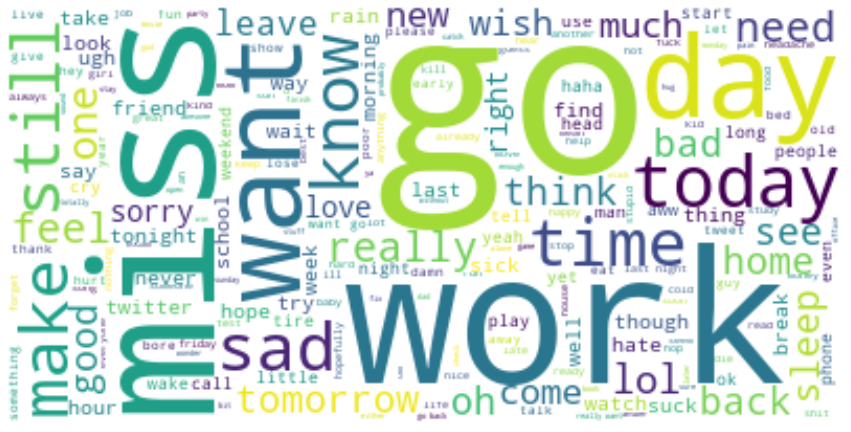

In [446]:
#Wordcloud for negative class (0)
form_word_cloud(class_0_text_preprocessed)

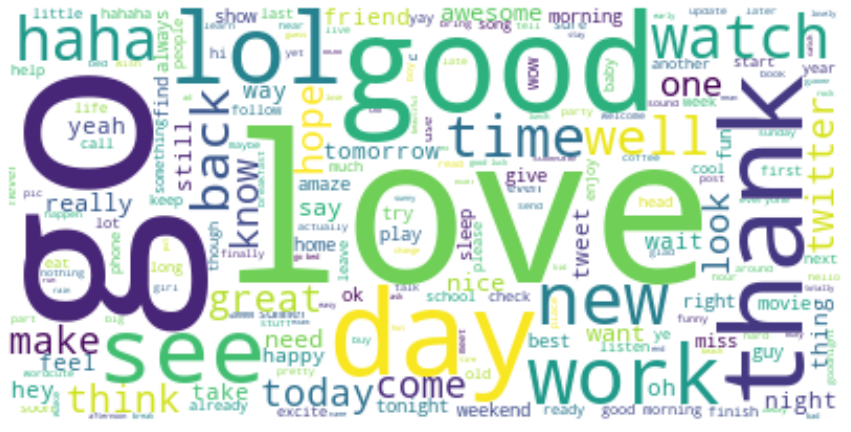

In [447]:
#Wordcloud for positive class (1)
form_word_cloud(class_1_text_preprocessed)

# Q4

In [449]:
#Performing VADER sentiment analysis

def perform_vader_sentiment_analysis(data):
  '''Forms a wordcloud of the data

  Parameters:
  ------------
  data: list
    Text samples for which sentiment analysis is to be done
    
  Returns
  ------------
  list
    A list consisting of predicted labels of the textual data (0: negative, 1: positive, -1:neutral)

  '''

  sent_analyzer = SentimentIntensityAnalyzer()
  predicted_scores = [sent_analyzer.polarity_scores(text)['compound'] for text in data]
  predicted_labels = []
  for score in predicted_scores:
    if(score>=0.05):
      predicted_labels.append(1)
    elif(score<=-0.05):
      predicted_labels.append(0)
    else:
      predicted_labels.append(-1)
  return predicted_labels

In [450]:
#Performing VADER sentiment analysis

def perform_vader_sentiment_analysis_no_compound(data):
  '''Forms a wordcloud of the data

  Parameters:
  ------------
  data: list
    Text samples for which sentiment analysis is to be done
    
  Returns
  ------------
  list
    A list consisting of predicted labels of the textual data (0: negative, 1: positive)

  '''

  sent_analyzer = SentimentIntensityAnalyzer()
  predicted_scores = [sent_analyzer.polarity_scores(text) for text in data]
  predicted_labels = []
  for score in predicted_scores:
    if(score['pos']>=score['neg']):
      predicted_labels.append(1)
    else:
      predicted_labels.append(0)
  return predicted_labels

In [451]:
#Finding accuracy

def find_accuracy(y_true, y_pred):
  '''Forms a wordcloud of the data

  Parameters:
  ------------
  y_true: list
    True labels
  y_pred: list
    Predicted labels
    
  Returns
  ------------
  double
    accuracy score for the prediction
  '''

  n_samples = len(y_true)
  correct_pred = 0
  for i in range(n_samples):
    if(y_true[i] == y_pred[i]):
      correct_pred+=1
  return 0 if n_samples==0 else correct_pred/n_samples
  

# Case 0: Considering neutral as incorrect classification


PREPROCESSED TEXT

In [483]:
y_pred_with_neu = perform_vader_sentiment_analysis([' '.join(token_list) for token_list in list(df_preprocessed['TEXT_PREPROCESSED'])])
y_pred_case1_a = y_pred_with_neu
df_case1_a = df_preprocessed.copy(deep=True)
df_case1_a['LABEL_PRED'] = y_pred_case1_a

In [484]:
df_case1_a.head()

,LABEL,DATE_TIME,TEXT_PREPROCESSED,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,"[get, thread, scar]",-1
1,1,Thu May 14 10:13:55 2009,"[like, sean, mango, one, yesterday]",1
2,1,Fri Jun 05 21:02:20 2009,"[work, car, work, shower, go, bed, soooooooooo...",-1
3,1,Sun Jun 14 22:25:52 2009,"[actually, start, afternoon, try, something, w...",-1
4,1,Sun May 31 00:42:12 2009,"[aww, lido, worry, vote, nonstop, coz, love, m...",1


In [485]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df_preprocessed["LABEL"]), y_pred_case1_a)}')

The accuracy score for sentiment analysis using VADER is 0.5236762304641941


RAW TEXT

In [486]:
y_pred_with_neu = perform_vader_sentiment_analysis(list(df['TEXT']))
y_pred_case1_a = y_pred_with_neu
df_case1_a = df.copy(deep=True)
df_case1_a['LABEL_PRED'] = y_pred_case1_a

In [487]:
df_case1_a.head()


,LABEL,DATE_TIME,TEXT,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,1
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,0
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,-1
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,1


In [488]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df["LABEL"]), y_pred_case1_a)}')

The accuracy score for sentiment analysis using VADER is 0.5323069745742944


# Case 1: Considering Compound Score


a) Considering neutral labels as positive

PREPROCESSED TEXT

In [452]:
y_pred_with_neu = perform_vader_sentiment_analysis([' '.join(token_list) for token_list in list(df_preprocessed['TEXT_PREPROCESSED'])])
y_pred_case1_a = [1 if score==1 or score==-1 else 0 for score in y_pred_with_neu]
df_case1_a = df_preprocessed.copy(deep=True)
df_case1_a['LABEL_PRED'] = y_pred_case1_a

In [453]:
df_case1_a.head()

,LABEL,DATE_TIME,TEXT_PREPROCESSED,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,"[get, thread, scar]",1
1,1,Thu May 14 10:13:55 2009,"[like, sean, mango, one, yesterday]",1
2,1,Fri Jun 05 21:02:20 2009,"[work, car, work, shower, go, bed, soooooooooo...",1
3,1,Sun Jun 14 22:25:52 2009,"[actually, start, afternoon, try, something, w...",1
4,1,Sun May 31 00:42:12 2009,"[aww, lido, worry, vote, nonstop, coz, love, m...",1


In [454]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df_preprocessed["LABEL"]), y_pred_case1_a)}')

The accuracy score for sentiment analysis using VADER is 0.6592022393282015


RAW TEXT

In [455]:
y_pred_with_neu = perform_vader_sentiment_analysis(list(df['TEXT']))
y_pred_case1_a = [1 if score==1 or score==-1 else 0 for score in y_pred_with_neu]
df_case1_a = df.copy(deep=True)
df_case1_a['LABEL_PRED'] = y_pred_case1_a

In [456]:
df_case1_a.head()


,LABEL,DATE_TIME,TEXT,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,1
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,0
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,1
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,1


In [457]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df["LABEL"]), y_pred_case1_a)}')

The accuracy score for sentiment analysis using VADER is 0.681828784697924


b) Considering neutral labels as negative

PREPROCESSED TEXT

In [458]:
y_pred_with_neu = perform_vader_sentiment_analysis([' '.join(token_list) for token_list in list(df_preprocessed['TEXT_PREPROCESSED'])])
y_pred_case1_b = [0 if score==0 or score==-1 else 1 for score in y_pred_with_neu]
df_case1_b = df_preprocessed.copy(deep=True)
df_case1_b['LABEL_PRED'] = y_pred_case1_b

In [459]:
df_case1_b.head()

,LABEL,DATE_TIME,TEXT_PREPROCESSED,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,"[get, thread, scar]",0
1,1,Thu May 14 10:13:55 2009,"[like, sean, mango, one, yesterday]",1
2,1,Fri Jun 05 21:02:20 2009,"[work, car, work, shower, go, bed, soooooooooo...",0
3,1,Sun Jun 14 22:25:52 2009,"[actually, start, afternoon, try, something, w...",0
4,1,Sun May 31 00:42:12 2009,"[aww, lido, worry, vote, nonstop, coz, love, m...",1


In [460]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df_preprocessed["LABEL"]), y_pred_case1_a)}')

The accuracy score for sentiment analysis using VADER is 0.681828784697924


RAW TEXT

In [461]:
y_pred_with_neu = perform_vader_sentiment_analysis(list(df['TEXT']))
y_pred_case1_b = [0 if score==0 or score==-1 else 1 for score in y_pred_with_neu]
df_case1_b = df.copy(deep=True)
df_case1_b['LABEL_PRED'] = y_pred_case1_b

In [462]:
df_case1_b.head()

,LABEL,DATE_TIME,TEXT,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,1
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,0
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,0
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,1


In [463]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df["LABEL"]), y_pred_case1_b)}')

The accuracy score for sentiment analysis using VADER is 0.6524376020527175


# Case 2: Not considering compound Score

PREPROCESSED TEXT

In [464]:
y_pred = perform_vader_sentiment_analysis_no_compound([' '.join(token_list) for token_list in list(df_preprocessed['TEXT_PREPROCESSED'])])
df_case2 = df_preprocessed.copy(deep=True)
df_case2['LABEL_PRED'] = y_pred

In [465]:
df_case2.head()

,LABEL,DATE_TIME,TEXT_PREPROCESSED,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,"[get, thread, scar]",1
1,1,Thu May 14 10:13:55 2009,"[like, sean, mango, one, yesterday]",1
2,1,Fri Jun 05 21:02:20 2009,"[work, car, work, shower, go, bed, soooooooooo...",1
3,1,Sun Jun 14 22:25:52 2009,"[actually, start, afternoon, try, something, w...",1
4,1,Sun May 31 00:42:12 2009,"[aww, lido, worry, vote, nonstop, coz, love, m...",1


In [466]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df_preprocessed["LABEL"]), y_pred)}')

The accuracy score for sentiment analysis using VADER is 0.6634009797060881


RAW TEXT

In [467]:
y_pred = perform_vader_sentiment_analysis_no_compound(list(df['TEXT']))
df_case2 = df.copy(deep=True)
df_case2['LABEL_PRED'] = y_pred

In [468]:
df_case2.head()

,LABEL,DATE_TIME,TEXT,LABEL_PRED
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,1
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,0
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,1
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,1


In [469]:
print(f'The accuracy score for sentiment analysis using VADER is {find_accuracy(list(df["LABEL"]), y_pred)}')

The accuracy score for sentiment analysis using VADER is 0.6846279449498484
